# LAB 2

## Goal

* Given the features in the dataset, what is the best combination to have a new indeterminate contract before covid?
* Is the combination of features the same after the covid?


In this lab, the goal will be to prepare data and then apply it to the model. 

### Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl

### Functions

In [3]:
def Import_And_Clean_Ateco():
    
    # Lettura Dataset contenente i codici ateco
    df_ateco = pd.read_csv("ateco.csv")

    # Rimozione del codice ateco dalla descrizione Ateco
    for Index in range(len(df_ateco["Codice_ateco"])):
        df_ateco["Descrizione_ateco"][Index] = df_ateco["Descrizione_ateco"][Index][len(df_ateco["Codice_ateco"][Index])+2:len(df_ateco["Descrizione_ateco"][Index])]
    
        # Rimozione dello spazio iniziale
        df_ateco["Descrizione_ateco"][Index] = df_ateco["Descrizione_ateco"][Index].strip()
    
    # Drop della colonna id perchè non serve
    df_ateco = df_ateco.drop("_id",axis=1)
    
    # Rinominazione della colonna della descrizione per fare successivamente il join
    df_ateco.rename(columns = {"Descrizione_ateco":"SETTOREECONOMICODETTAGLIO"}, inplace = True)
    
    # Lower case di tutta la colonna del settore economico per fare la join con gli altri dataset
    df_ateco["SETTOREECONOMICODETTAGLIO"] = df_ateco["SETTOREECONOMICODETTAGLIO"].str.lower()
    
    # Rimozione dei codici duplicati (dataset corrotto?)
    df_ateco.drop_duplicates(subset="SETTOREECONOMICODETTAGLIO",keep="first",inplace=True)
    
    return df_ateco

### Import data and analysis

In [4]:
attivati = pd.read_csv("Rapporti_di_lavoro_attivati.csv")

In [5]:
ateco = Import_And_Clean_Ateco()

/var/folders/yd/g365x5x52q1g5t36bw5cx0bh0000gn/T/ipykernel_9994/2304811658.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ateco["Descrizione_ateco"][Index] = df_ateco["Descrizione_ateco"][Index][len(df_ateco["Codice_ateco"][Index])+2:len(df_ateco["Descrizione_ateco"][Index])]
/var/folders/yd/g365x5x52q1g5t36bw5cx0bh0000gn/T/ipykernel_9994/2304811658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ateco["Descrizione_ateco"][Index] = df_ateco["Descrizione_ateco"][Index].strip()


In [6]:
#Transformations of the strings in upper case, to make join
attivati['SETTOREECONOMICODETTAGLIO'] = attivati['SETTOREECONOMICODETTAGLIO'].str.upper()
ateco['SETTOREECONOMICODETTAGLIO'] = ateco['SETTOREECONOMICODETTAGLIO'].str.upper()

In [7]:
#Retrieve only the year from the date 
attivati['DATA'] = pd.to_datetime(attivati['DATA'])
attivati ['ANNO'] = attivati.DATA.dt.year
attivati = attivati.drop(labels='DATA', axis=1)

In [8]:
#Join between the two DataFrames
join = pd.merge(attivati, ateco, on =['SETTOREECONOMICODETTAGLIO'], how='inner')
join

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco
0,F,60,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020,97
1,F,33,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,97
2,F,45,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIA,2019,97
3,F,61,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,LECCO,UCRAINA,2014,97
4,F,20,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,97
...,...,...,...,...,...,...,...,...,...,...
9363696,M,38,TRASPORTO MEDIANTE CONDOTTE DI LIQUIDI,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2020,49.50.2
9363697,F,40,RICARICA DI BOMBOLE PER ATTIVITÀ SUBACQUEE,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,COLLABORAZIONE COORDINATA E CONTINUATIVA,NON DEFINITO,BRESCIA,ITALIA,2021,93.19.91
9363698,M,28,RICARICA DI BOMBOLE PER ATTIVITÀ SUBACQUEE,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,MONZA E BRIANZA,ITALIA,2012,93.19.91
9363699,F,25,RICARICA DI BOMBOLE PER ATTIVITÀ SUBACQUEE,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,COLLABORAZIONE COORDINATA E CONTINUATIVA,NON DEFINITO,BRESCIA,ITALIA,2018,93.19.91


In [9]:
#Obtain only the first two digits of the 'codice ateco' to understand the macro category
join.Codice_ateco.replace(r'^(..)\..*' , r'\1',regex=True, inplace = True,)
join

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco
0,F,60,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020,97
1,F,33,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,97
2,F,45,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIA,2019,97
3,F,61,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,LECCO,UCRAINA,2014,97
4,F,20,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,97
...,...,...,...,...,...,...,...,...,...,...
9363696,M,38,TRASPORTO MEDIANTE CONDOTTE DI LIQUIDI,LICENZA MEDIA,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,2020,49
9363697,F,40,RICARICA DI BOMBOLE PER ATTIVITÀ SUBACQUEE,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,COLLABORAZIONE COORDINATA E CONTINUATIVA,NON DEFINITO,BRESCIA,ITALIA,2021,93
9363698,M,28,RICARICA DI BOMBOLE PER ATTIVITÀ SUBACQUEE,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,MONZA E BRIANZA,ITALIA,2012,93
9363699,F,25,RICARICA DI BOMBOLE PER ATTIVITÀ SUBACQUEE,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,COLLABORAZIONE COORDINATA E CONTINUATIVA,NON DEFINITO,BRESCIA,ITALIA,2018,93


In [10]:
join2 = pd.merge(join, ateco, on='Codice_ateco', how='inner')
join2

,GENERE,ETA,SETTOREECONOMICODETTAGLIO_x,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y
0,F,60,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
1,F,33,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
2,F,45,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIA,2019,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
3,F,61,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,LECCO,UCRAINA,2014,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
4,F,20,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
...,...,...,...,...,...,...,...,...,...,...,...
9363696,M,36,INDUSTRIA DEL TABACCO,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,BERGAMO,ITALIA,2012,12,INDUSTRIA DEL TABACCO
9363697,M,35,INDUSTRIA DEL TABACCO,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,12,INDUSTRIA DEL TABACCO
9363698,M,27,INDUSTRIA DEL TABACCO,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,12,INDUSTRIA DEL TABACCO
9363699,M,37,INDUSTRIA DEL TABACCO,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,BERGAMO,ITALIA,2012,12,INDUSTRIA DEL TABACCO


In [11]:
join2 = join2.drop(labels='SETTOREECONOMICODETTAGLIO_x', axis=1)

In [12]:
#Transformations of the strings in upper case, to make a match, without problem
join2['CONTRATTO']=join2['CONTRATTO'].str.upper()
join2

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y
0,F,60,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
1,F,33,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,HONDURAS,2012,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
2,F,45,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,ITALIA,2019,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
3,F,61,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,LECCO,UCRAINA,2014,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
4,F,20,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PARZIALE ORIZZONTALE,LECCO,ITALIA,2014,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
...,...,...,...,...,...,...,...,...,...,...
9363696,M,36,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,BERGAMO,ITALIA,2012,12,INDUSTRIA DEL TABACCO
9363697,M,35,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,2011,12,INDUSTRIA DEL TABACCO
9363698,M,27,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA,2009,12,INDUSTRIA DEL TABACCO
9363699,M,37,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,NaN,BERGAMO,ITALIA,2012,12,INDUSTRIA DEL TABACCO


In [13]:
#Select only the indeterminate contracts
indeterminato = join2[join2['CONTRATTO'].str.match(r'.*INDETERMINATO.*')== True].reset_index()
indeterminato=indeterminato.drop(labels=['index', 'CONTRATTO'], axis=1)
indeterminato

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y
0,F,31,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,SENEGAL,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
1,M,46,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,BOLIVIA,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
2,F,35,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,ECUADOR,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
3,F,66,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2008,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
4,M,45,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
...,...,...,...,...,...,...,...,...,...
1359505,F,26,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,BERGAMO,ITALIA,2019,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE
1359506,F,28,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2014,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE
1359507,M,33,LICENZA MEDIA,TEMPO PIENO,MILANO,ITALIA,2009,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE
1359508,M,34,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2021,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE


### Label Encoder

In [14]:
titolostudio = indeterminato.TITOLOSTUDIO.tolist()
modlavoro = indeterminato.MODALITALAVORO.tolist()
prov = indeterminato.PROVINCIAIMPRESA.tolist()
nazionalita = indeterminato.ITALIANO.tolist()
copia = indeterminato.copy()

In [15]:
# instantiate labelencoder object for each column that we want to encode
le_titolostudio = LabelEncoder()
le_modlavoro = LabelEncoder()
le_prov = LabelEncoder()
le_nazionalita = LabelEncoder()

In [16]:
#apply the label encoder to the dataset
le_titolostudio.fit(copia['TITOLOSTUDIO'])
le_modlavoro.fit(copia['MODALITALAVORO'])
le_prov.fit(copia['PROVINCIAIMPRESA'])
le_nazionalita.fit(copia['ITALIANO'])

LabelEncoder()

In [17]:
#transform into integers
transformation_ts = le_titolostudio.transform(indeterminato['TITOLOSTUDIO']) 
transformation_ts

array([ 8,  8,  8, ...,  6,  4, 10])

In [18]:
# try to invert a transformation using the object
list(le_titolostudio.inverse_transform([8]))

['NESSUN TITOLO DI STUDIO']

In [19]:
#transform into integers
transformation_ml = le_modlavoro.transform(indeterminato['MODALITALAVORO']) 
transformation_prov = le_prov.transform(indeterminato['PROVINCIAIMPRESA']) 
transformation_nazion = le_nazionalita.transform(indeterminato['ITALIANO']) 

In [20]:
# apply label encoder on categorical feature columns
copia['titolostudio_transformed'] = list(transformation_ts)
copia['modalitalavoro_transformed'] = list(transformation_ml)
copia['provincia_transformed'] = list(transformation_prov)
copia['nazionalita_transformed'] = list(transformation_nazion)
copia

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed
0,F,31,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,SENEGAL,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,141
1,M,46,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,BOLIVIA,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,21
2,F,35,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,ECUADOR,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,50
3,F,66,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2008,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,58
4,M,45,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359505,F,26,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,BERGAMO,ITALIA,2019,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,0,84
1359506,F,28,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2014,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,7,84
1359507,M,33,LICENZA MEDIA,TEMPO PIENO,MILANO,ITALIA,2009,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,6,4,7,84
1359508,M,34,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2021,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,7,84


### Encoding Manually Ordinal Categorical Features

In [21]:
# Create mapper
scale_mapper = {'M':0, 'F':1}

# Map feature values to scale
copia['genere_transformed'] = copia['GENERE'].replace(scale_mapper)
copia

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,F,31,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,SENEGAL,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,141,1
1,M,46,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,BOLIVIA,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,21,0
2,F,35,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,ECUADOR,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,50,1
3,F,66,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2008,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,58,1
4,M,45,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359505,F,26,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,BERGAMO,ITALIA,2019,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,0,84,1
1359506,F,28,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2014,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,7,84,1
1359507,M,33,LICENZA MEDIA,TEMPO PIENO,MILANO,ITALIA,2009,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,6,4,7,84,0
1359508,M,34,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2021,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,7,84,0


In [22]:
# Drop the columns that have been transformed
transformed_indet = copia.drop(labels =['GENERE', 'TITOLOSTUDIO', 'MODALITALAVORO', 'PROVINCIAIMPRESA', 'ITALIANO', 'SETTOREECONOMICODETTAGLIO_y'], axis=1)
transformed_indet

,ETA,ANNO,Codice_ateco,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,31,2010,97,8,2,4,141,1
1,46,2010,97,8,2,4,21,0
2,35,2010,97,8,2,4,50,1
3,66,2008,97,8,2,4,58,1
4,45,2010,97,8,2,4,58,0
...,...,...,...,...,...,...,...,...
1359505,26,2019,06,4,4,0,84,1
1359506,28,2014,06,4,4,7,84,1
1359507,33,2009,06,6,4,7,84,0
1359508,34,2021,06,4,4,7,84,0


In [23]:
transformed_indet['Codice_ateco'] = transformed_indet['Codice_ateco'].astype(str).astype(int)
transformed_indet.dtypes

ETA                           int64
ANNO                          int64
Codice_ateco                  int64
titolostudio_transformed      int64
modalitalavoro_transformed    int64
provincia_transformed         int64
nazionalita_transformed       int64
genere_transformed            int64
dtype: object

In [24]:
transformed_indet

,ETA,ANNO,Codice_ateco,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,31,2010,97,8,2,4,141,1
1,46,2010,97,8,2,4,21,0
2,35,2010,97,8,2,4,50,1
3,66,2008,97,8,2,4,58,1
4,45,2010,97,8,2,4,58,0
...,...,...,...,...,...,...,...,...
1359505,26,2019,6,4,4,0,84,1
1359506,28,2014,6,4,4,7,84,1
1359507,33,2009,6,6,4,7,84,0
1359508,34,2021,6,4,4,7,84,0


### Test normal distribution of the data SARA
 

In [25]:
copia

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,F,31,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,SENEGAL,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,141,1
1,M,46,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,BOLIVIA,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,21,0
2,F,35,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,ECUADOR,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,50,1
3,F,66,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2008,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,58,1
4,M,45,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359505,F,26,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,BERGAMO,ITALIA,2019,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,0,84,1
1359506,F,28,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2014,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,7,84,1
1359507,M,33,LICENZA MEDIA,TEMPO PIENO,MILANO,ITALIA,2009,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,6,4,7,84,0
1359508,M,34,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2021,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,7,84,0


In [26]:
nuovo = transformed_indet.drop(labels = 'genere_transformed', axis = 1)
nuovo

,ETA,ANNO,Codice_ateco,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed
0,31,2010,97,8,2,4,141
1,46,2010,97,8,2,4,21
2,35,2010,97,8,2,4,50
3,66,2008,97,8,2,4,58
4,45,2010,97,8,2,4,58
...,...,...,...,...,...,...,...
1359505,26,2019,6,4,4,0,84
1359506,28,2014,6,4,4,7,84
1359507,33,2009,6,6,4,7,84
1359508,34,2021,6,4,4,7,84


In [27]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

stat, p = shapiro(nuovo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.455, p=0.000
Sample does not look Gaussian (reject H0)


/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


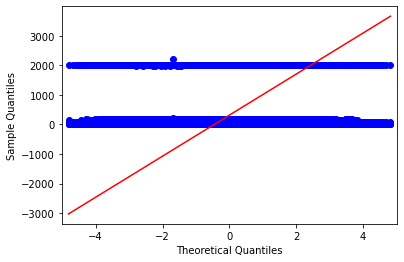

In [28]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(nuovo, line='s')
pyplot.show()

# SCRIVERE QUALCOSA

# Principal component analysis 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math, random

from sklearn import preprocessing

plt.style.use('ggplot')

In [30]:
# Defining a function for scaling the features of a dataset

def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:
    
    scaled = preprocessing.StandardScaler(with_mean = False).fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    
    return scaled

In [31]:
scaleFeatures = True
df = nuovo
if scaleFeatures: df = scaleFeaturesDF(df)

New Variances:
 ETA                           1.000001
ANNO                          1.000001
Codice_ateco                  1.000001
titolostudio_transformed      1.000001
modalitalavoro_transformed    1.000001
provincia_transformed         1.000001
nazionalita_transformed       1.000001
dtype: float64
New Describe:
                 ETA          ANNO  Codice_ateco  titolostudio_transformed  \
count  1.359510e+06  1.359510e+06  1.359510e+06              1.359510e+06   
mean   3.427258e+00  5.464315e+02  2.354750e+00              1.752350e+00   
std    1.000000e+00  1.000000e+00  1.000000e+00              1.000000e+00   
min    0.000000e+00  5.351115e+02  4.043505e-02              0.000000e+00   
25%    2.593687e+00  5.454178e+02  1.738707e+00              1.287885e+00   
50%    3.334741e+00  5.465027e+02  2.264363e+00              1.931827e+00   
75%    4.168426e+00  5.473163e+02  3.315674e+00              2.575769e+00   
max    2.047160e+01  5.969491e+02  3.962635e+00              3.86

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
PCA(copy=True, n_components=2, whiten=False)
T = pca.transform(df)

In [33]:
pca.explained_variance_ratio_

array([0.21426428, 0.15970533])

In [34]:
# Defining a function for visualizations

def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax



In [35]:
df.dtypes

ETA                           float64
ANNO                          float64
Codice_ateco                  float64
titolostudio_transformed      float64
modalitalavoro_transformed    float64
provincia_transformed         float64
nazionalita_transformed       float64
dtype: object

In [36]:
# We define color red if the record is 'ckd' for the features classification, while green if it is 'notckd'
labels = ['red' if i=='F' else 'green' for i in copia.GENERE]

Features by importance:
 [(14.692778271365253, 'modalitalavoro_transformed'), (14.141768576960974, 'ANNO'), (13.369064673981349, 'Codice_ateco'), (11.322650268853618, 'titolostudio_transformed'), (8.034381816810752, 'nazionalita_transformed'), (5.798863286552659, 'ETA'), (2.247729602033312, 'provincia_transformed')]


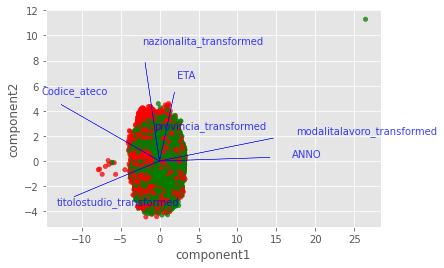

In [37]:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

In [38]:
# Concating PCA's dataframe and starting dataset
df_corr = pd.concat([T, df], axis = 1)
df_corr.head()

,component1,component2,ETA,ANNO,Codice_ateco,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed
0,-2.519798,1.139274,2.871582,545.146580,3.9222,2.575769,1.789028,1.258208,4.541897
1,-2.148635,-0.864452,4.261058,545.146580,3.9222,2.575769,1.789028,1.258208,0.676453
2,-2.287814,-0.711515,3.242109,545.146580,3.9222,2.575769,1.789028,1.258208,1.610602
3,-2.388022,0.845977,6.113691,544.604146,3.9222,2.575769,1.789028,1.258208,1.868298
4,-2.238756,-0.083795,4.168426,545.146580,3.9222,2.575769,1.789028,1.258208,1.868298


In [39]:
corr_matrix = df_corr.corr()
corr_matrix

,component1,component2,ETA,ANNO,Codice_ateco,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed
component1,1.000000e+00,-8.696530e-16,0.088704,0.655114,-0.583558,-0.507831,0.675525,-0.026329,-0.085709
component2,-8.696530e-16,1.000000e+00,0.512749,0.026476,0.420055,-0.266207,0.170605,0.203715,0.732398
ETA,8.870409e-02,5.127491e-01,1.000000,0.061817,0.020397,0.020861,0.047257,-0.001667,0.065673
ANNO,6.551143e-01,2.647557e-02,0.061817,1.000000,-0.172456,-0.186581,0.181102,0.019090,-0.055418
Codice_ateco,-5.835585e-01,4.200549e-01,0.020397,-0.172456,1.000000,0.033457,-0.226022,0.074641,0.103644
titolostudio_transformed,-5.078312e-01,-2.662068e-01,0.020861,-0.186581,0.033457,1.000000,-0.172547,-0.031240,-0.021033
modalitalavoro_transformed,6.755253e-01,1.706051e-01,0.047257,0.181102,-0.226022,-0.172547,1.000000,0.000553,0.054603
provincia_transformed,-2.632936e-02,2.037153e-01,-0.001667,0.019090,0.074641,-0.031240,0.000553,1.000000,-0.021012
nazionalita_transformed,-8.570937e-02,7.323977e-01,0.065673,-0.055418,0.103644,-0.021033,0.054603,-0.021012,1.000000


([<matplotlib.axis.YTick at 0x7fe7d23c20d0>,
 [Text(0, 0, 'component1'),
  Text(0, 1, 'component2'),
  Text(0, 2, 'ETA'),
  Text(0, 3, 'ANNO'),
  Text(0, 4, 'Codice_ateco'),
  Text(0, 5, 'titolostudio_transformed'),
  Text(0, 6, 'modalitalavoro_transformed'),
  Text(0, 7, 'provincia_transformed'),
  Text(0, 8, 'nazionalita_transformed')])

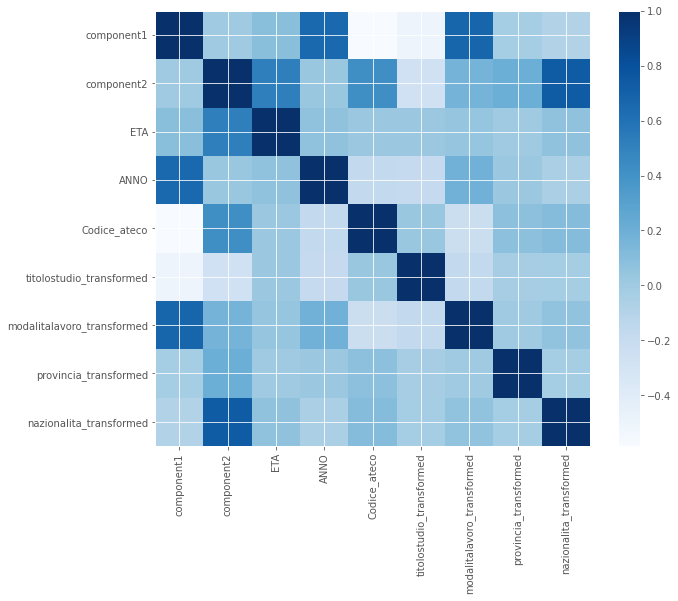

In [40]:
# Create a figure
fig = plt.figure(figsize=(10,8))

plt.imshow(df_corr.corr(), cmap = plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df_corr.columns))]
plt.xticks(tick_marks, df_corr.columns, rotation='vertical')
plt.yticks(tick_marks, df_corr.columns)

## Time Series

### Outliers 

In [46]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [47]:
indet_covid = indeterminato[indeterminato.ANNO >= 2010].reset_index(drop=True)
indet_covid = indet_covid[indet_covid.ANNO <= 2022].reset_index(drop=True)
indet_covid

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y
0,F,31,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,SENEGAL,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
1,M,46,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,BOLIVIA,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
2,F,35,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,ECUADOR,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
3,M,45,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
4,F,38,NESSUN TITOLO DI STUDIO,TEMPO PIENO,BRESCIA,NIGERIA,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...
...,...,...,...,...,...,...,...,...,...
1282756,M,28,LICENZA MEDIA,TEMPO PIENO,BERGAMO,ITALIA,2019,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE
1282757,F,26,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,BERGAMO,ITALIA,2019,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE
1282758,F,28,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2014,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE
1282759,M,34,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2021,06,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE


In [61]:
#indet = indet_covid.groupby('ANNO').mean()
indet = indeterminato.groupby('ANNO').mean()
indet

,ETA
ANNO,
1973,20.000000
1974,21.000000
1976,21.000000
1978,25.500000
1979,25.000000
1980,25.000000
1981,35.000000
1982,28.000000
1988,19.000000


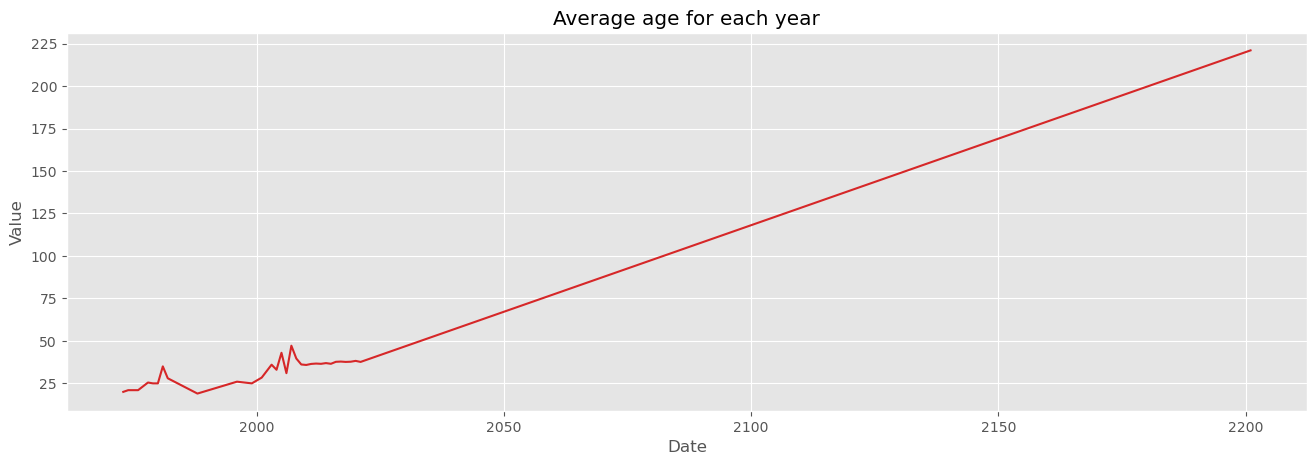

In [62]:
plot_df(indet, x=indet.index, y=indet.ETA, title='Average age for each year')

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ETA'>

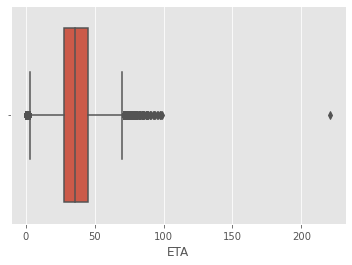

In [52]:
import seaborn as sns
sns.boxplot(copia['ETA'])

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ANNO'>

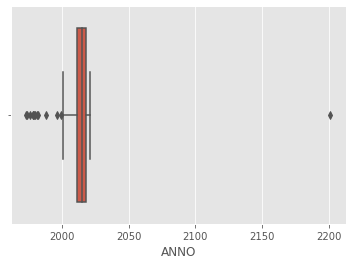

In [53]:
sns.boxplot(copia['ANNO'])

In [54]:
copia['Codice_ateco']=copia.Codice_ateco.astype(int)

<AxesSubplot:xlabel='Codice_ateco'>

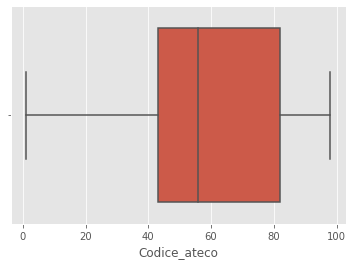

In [55]:
sns.boxplot(x = copia['Codice_ateco'])

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genere_transformed'>

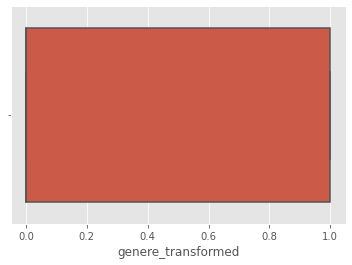

In [56]:
sns.boxplot(copia['genere_transformed'])

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='titolostudio_transformed'>

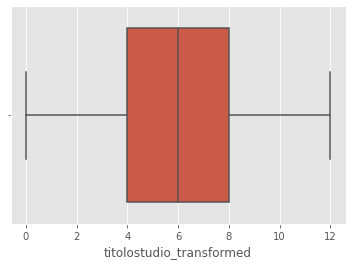

In [57]:
sns.boxplot(copia['titolostudio_transformed'])

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='modalitalavoro_transformed'>

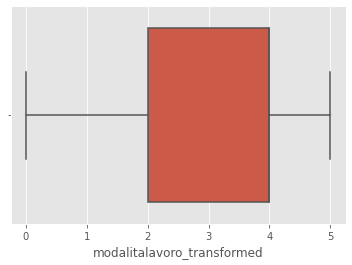

In [58]:
sns.boxplot(copia['modalitalavoro_transformed'])

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='provincia_transformed'>

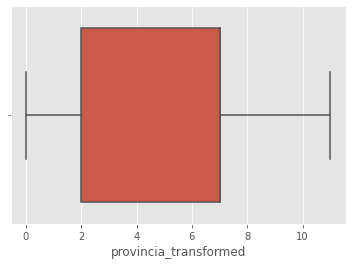

In [59]:
sns.boxplot(copia['provincia_transformed'])

In [64]:
#Find the outlier
copia[copia['ETA']>100]

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
63239,M,221,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,MILANO,SIRIA,2201,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,7,147,0


In [70]:
#Find the outlier
copia[copia['ANNO']>2022]

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed


In [65]:
copia[copia['ETA']<15]

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
3412,F,14,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,UCRAINA,2001,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,0,176,1
22778,M,5,NESSUN TITOLO DI STUDIO,TEMPO PIENO,BRESCIA,ITALIA,2019,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,1,84,0
27144,F,12,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,MANTOVA,Moldova,2001,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,6,115,1
27932,M,14,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,MILANO,FILIPPINE,2001,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,7,58,0
45038,F,10,NESSUN TITOLO DI STUDIO,TEMPO PIENO,VARESE,GHANA,2001,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,4,11,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355035,F,11,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2015,21,FABBRICAZIONE DI PRODOTTI FARMACEUTICI DI BASE...,4,4,7,84,1
1355195,M,6,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2010,21,FABBRICAZIONE DI PRODOTTI FARMACEUTICI DI BASE...,4,4,7,84,0
1355212,F,10,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2014,21,FABBRICAZIONE DI PRODOTTI FARMACEUTICI DI BASE...,4,4,7,84,1
1355743,F,7,NESSUN TITOLO DI STUDIO,TEMPO PIENO,MILANO,ITALIA,2011,21,FABBRICAZIONE DI PRODOTTI FARMACEUTICI DI BASE...,8,4,7,84,1


In [66]:
#We remove the rows with age<15, because it's illegal. 
copia = copia[copia['ETA']>=15]
copia

,GENERE,ETA,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,Codice_ateco,SETTOREECONOMICODETTAGLIO_y,titolostudio_transformed,modalitalavoro_transformed,provincia_transformed,nazionalita_transformed,genere_transformed
0,F,31,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,SENEGAL,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,141,1
1,M,46,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,BOLIVIA,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,21,0
2,F,35,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,ECUADOR,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,50,1
3,F,66,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2008,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,58,1
4,M,45,NESSUN TITOLO DI STUDIO,TEMPO PARZIALE ORIZZONTALE,LECCO,FILIPPINE,2010,97,ATTIVITÀ DI FAMIGLIE E CONVIVENZE COME DATORI ...,8,2,4,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359505,F,26,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,BERGAMO,ITALIA,2019,6,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,0,84,1
1359506,F,28,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2014,6,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,7,84,1
1359507,M,33,LICENZA MEDIA,TEMPO PIENO,MILANO,ITALIA,2009,6,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,6,4,7,84,0
1359508,M,34,LAUREA - Vecchio o nuovo ordinamento,TEMPO PIENO,MILANO,ITALIA,2021,6,ESTRAZIONE DI PETROLIO GREGGIO E DI GAS NATURALE,4,4,7,84,0


/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ETA'>

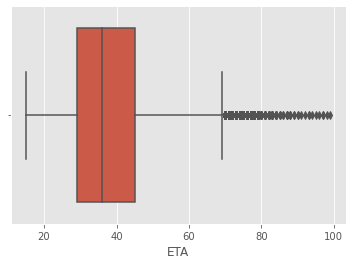

In [69]:
sns.boxplot(copia['ETA'])

/Users/saraferioli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ANNO'>

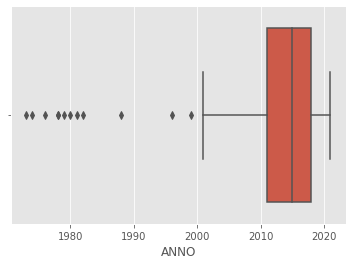

In [71]:
sns.boxplot(copia['ANNO'])

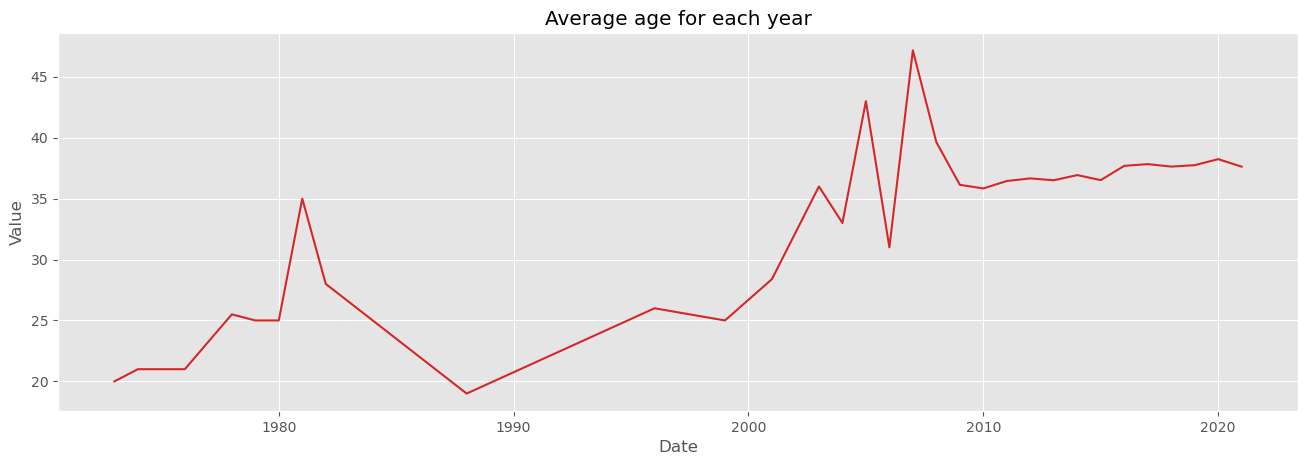

In [63]:
indet = indet[indet.index <= 2022]
plot_df(indet, x=indet.index, y=indet.ETA, title='Average age for each year')

un'altra cosa che si potrebbe vedere è il numero di contratti attivati al mese per ogni anno, per vedere se c'è stagionalità. ma come ?? (CHECK SEASONALITY DA NOTEBOOK TIMESERIES)

In [76]:
attivi = pd.read_csv("Rapporti_di_lavoro_attivati.csv")
attivi['DATA'] = pd.to_datetime(attivi['DATA'])
attivi ['ANNO'] = attivi.DATA.dt.year
attivi ['MESE'] = attivi.DATA.dt.month
attivi

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,ANNO,MESE
0,2020-09-05,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020,9
1,2019-12-07,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019,12
2,2013-05-06,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2013,5
3,2010-12-03,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,2010,12
4,2021-06-04,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,2021,6
...,...,...,...,...,...,...,...,...,...,...,...
9579789,2020-01-03,M,52,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2020,1
9579790,2010-06-09,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA,2010,6
9579791,2021-06-11,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL,2021,6
9579792,2010-02-02,M,35,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,TEMPO PIENO,BERGAMO,SENEGAL,2010,2


In [105]:
df_drugs = attivi[['ANNO', 'MESE']]
df_drugs = df_drugs.groupby(['ANNO', 'MESE']).size().reset_index(name='count')
df_drugs = df_drugs[df_drugs['ANNO']>2000]
df_drugs

,ANNO,MESE,count
14,2001,1,38
15,2003,3,1
16,2003,10,1
17,2004,6,2
18,2005,5,1
...,...,...,...
190,2021,7,68171
191,2021,8,60090
192,2021,9,92194
193,2021,10,45378


In [106]:
# Prepare data
years = df_drugs['ANNO'].unique()
years

array([2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2201])

In [107]:
# Draw Plot
fig = go.Figure()
for i, y in enumerate(years):
    if i > 0:  
        df=df_drugs[df_drugs['ANNO']==y]
        fig.add_trace(go.Scatter(x=df["MESE"], y=df["count"], mode='lines', name=str(y)))
        
        

# Decoration
#fig.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Contracts$', xlabel='$Month$')
#fig.title("Seasonal Activated Contracts Time Series", fontsize=20)
fig.show()

### Stationarity 

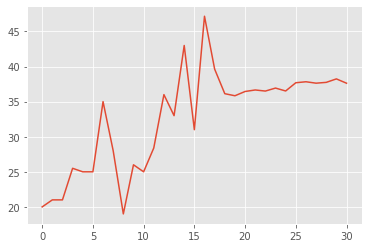

In [72]:
x = indet.index
y1 = indet.ETA.values
plt.plot(y1)

In [73]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    """
    Check Stationariety of time series.
    Please use np.array or pd.series as Input with your TS data only
    """
    #Convert numpy array to pandas serie
    if type(timeseries) is np.ndarray:
        df_timeseries = pd.Series(timeseries) 
        
    try:
        #Determing rolling statistics
        rolmean = df_timeseries.rolling(window=12).mean()
        rolstd = df_timeseries.rolling(window=12).std()

        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)

        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')

        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        
        # print(dfoutput)
    
        return dftest, dfoutput
    except Exception as message:
        print(f"Impossible to calc the stationariery of your TS: {message}")
        return None, None

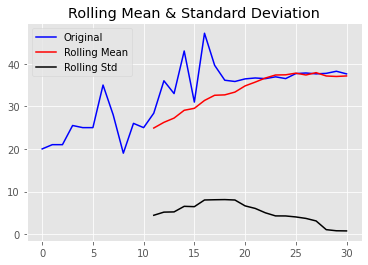

Results of Dickey-Fuller Test:


Test Statistic                 -1.882734
p-value                         0.340227
#Lags Used                      1.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64

In [74]:
dftest, dfoutput = test_stationarity(y1)
dfoutput

### Descriptive Analysis MICHELA

da dataframe indeterminati capire qualche caratteristica, come media, probabilità... 

### Group by features given as input MICHELA

clustering a seconda di alcune caratteristiche e vedere che cosa hanno in comune
genere + età + nazionalità 
t-SNE reductions